# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [ ]:
# Example reading the SQL database from here

from utils import db_connect
import pandas as pd
engine = db_connect()

dataframe = pd.read_sql("Select * from books;", engine)
print(dataframe.describe())

In [ ]:
# Example importing the CSV here

# dataframe = pd.read_csv('../path/to/file.csv')
# dataframe.describe()

In [6]:
!pip install lightgbm pandas numpy matplotlib seaborn sklearn
!pip install scikit-learn statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 79.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 65.6 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip


In [7]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from lightgbm import LGBMRegressor

In [10]:
test = pd.read_csv("bike_sharing_test.csv")
df_raw = pd.read_csv("bike_sharing_train.csv")

In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [12]:
df_raw.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10216,2012-11-11 02:00:00,4,0,0,1,13.12,16.665,87,7.0015,12,58,70
1918,2011-05-06 20:00:00,2,0,1,1,21.32,25.000,48,7.0015,29,161,190
664,2011-02-10 22:00:00,1,0,1,1,4.92,9.850,39,0.0000,4,47,51
10481,2012-12-03 03:00:00,4,0,1,1,15.58,19.695,87,0.0000,2,6,8
10012,2012-11-02 13:00:00,4,0,1,1,16.40,20.455,43,23.9994,64,230,294
3761,2011-09-07 16:00:00,3,0,1,1,26.24,28.790,89,0.0000,7,137,144
9253,2012-09-08 22:00:00,3,0,0,2,23.78,27.275,78,19.9995,18,176,194
6702,2012-03-16 13:00:00,1,0,1,2,18.86,22.725,77,6.0032,52,208,260
317,2011-01-14 17:00:00,1,0,1,1,9.02,11.365,41,11.0014,4,155,159
9902,2012-10-16 23:00:00,4,0,1,1,16.40,20.455,71,0.0000,23,176,199


In [14]:
df_interim = df_raw.copy()


In [15]:
df_interim["datetime"] = pd.to_datetime(df_interim.datetime)
df_interim = df_interim.set_index(df_interim.datetime)
df_interim["hour"] = df_interim.index.hour
df_interim["day"] = df_interim.index.day
df_interim["month"] = df_interim.index.month
df_interim = df_interim.drop(["datetime", "casual", "registered"], axis=1)

In [16]:
df_interim

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,0,1,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2,1,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,3,1,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,19,19,12
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,20,19,12
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,21,19,12


In [17]:
df = df_interim.copy()

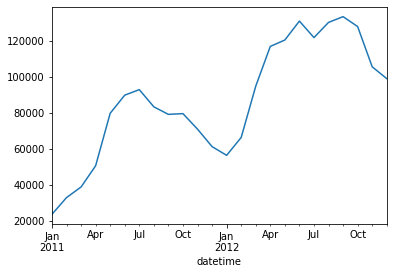

In [18]:
df["count"].resample("M").sum().plot()
plt.show()

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
count,10886.0,191.574132,181.144454,1.00,42.0000,145.000,284.0000,977.0000
hour,10886.0,11.541613,6.915838,0.00,6.0000,12.000,18.0000,23.0000


In [ ]:
#hacer hist 

In [21]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,0,1,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2,1,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,3,1,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,19,19,12
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,20,19,12
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,21,19,12


In [25]:
res = seasonal_decompose(df["count"].values[-250:], period=24)
res_observed = res.observed
res_trend = res.trend
res_seasonal = res.seasonal
res_resdual = res.resid

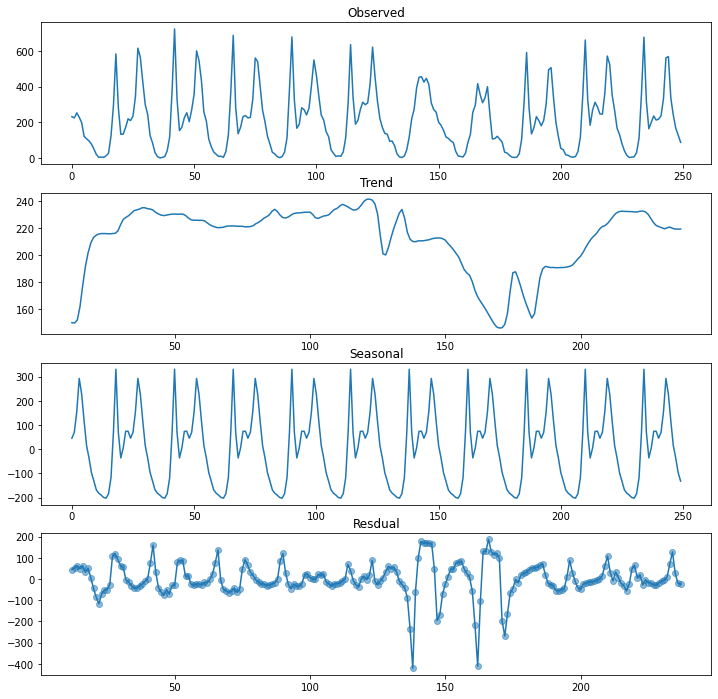

In [26]:
fig, ax = plt.subplots(4, figsize=(12,12))
ax[0].set_title("Observed")
ax[0].plot(res_observed)
ax[1].set_title("Trend")
ax[1].plot(res_trend)
ax[2].set_title("Seasonal")
ax[2].plot(res_seasonal)
ax[3].set_title("Resdual")
ax[3].plot(res_resdual)
ax[3].scatter(y=res_resdual, x=range(len(res_resdual)), alpha=.5)
plt.show()


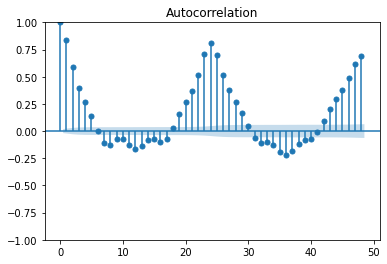

In [28]:
plot_acf(df["count"].values, lags=48)
plt.show()

In [29]:
X = df.drop("count", axis=1)
y = df["count"]
horizon = 168
X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]

In [30]:
model = LGBMRegressor(random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
mae = np.round(mean_absolute_error(y_test, y_pred), 1)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 1)
print(f"MAE:{mae}, RMSE:{rmse}")

MAE:53.8, RMSE:73.8


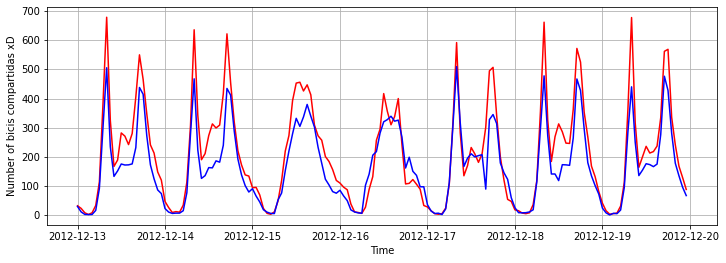

In [34]:
fig = plt.figure(figsize=(12,4))
plt.plot(y_test, color="Red")
plt.plot(pd.Series(y_pred, index=y_test.index), color="Blue")
plt.xlabel("Time")
plt.ylabel("Number of bicis compartidas xD")
plt.grid()
plt.show()

In [35]:
df_var_imp = pd.DataFrame({"var":model.feature_name_, "imp":model.feature_importances_}).sort_values(by="imp", ascending=False)
df_var_imp

,var,imp
8,hour,752
9,day,401
6,humidity,392
4,temp,323
2,workingday,253
10,month,226
5,atemp,222
7,windspeed,190
0,season,102
3,weather,87


In [36]:
df["count_lag_week"] = df["count"].shift(24*7)
df=df.dropna(how="any", axis=0)

MAE:32.7, RMSE:48.4


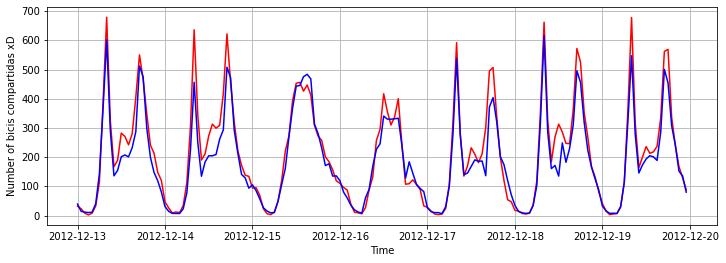

In [37]:
X = df.drop("count", axis=1)
y = df["count"]
horizon = 168
X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]
model = LGBMRegressor(random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = np.round(mean_absolute_error(y_test, y_pred), 1)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 1)
print(f"MAE:{mae}, RMSE:{rmse}")
fig = plt.figure(figsize=(12,4))
plt.plot(y_test, color="Red")
plt.plot(pd.Series(y_pred, index=y_test.index), color="Blue")
plt.xlabel("Time")
plt.ylabel("Number of bicis compartidas xD")
plt.grid()
plt.show()

In [38]:
df_var_imp = pd.DataFrame({"var":model.feature_name_, "imp":model.feature_importances_}).sort_values(by="imp", ascending=False)
df_var_imp

,var,imp
8,hour,703
11,count_lag_week,506
9,day,347
6,humidity,309
4,temp,296
2,workingday,237
5,atemp,170
10,month,154
7,windspeed,120
3,weather,70


In [39]:
df["count_lag_week"] = df["count"].shift(24*7*30)
df=df.dropna(how="any", axis=0)

/tmp/ipykernel_2252/2844281026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["count_lag_week"] = df["count"].shift(24*7*30)


MAE:50.8, RMSE:68.6


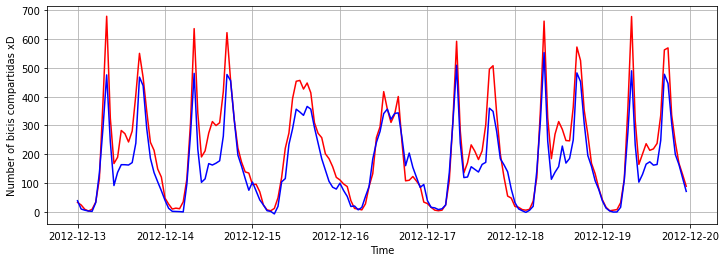

In [40]:
X = df.drop("count", axis=1)
y = df["count"]
horizon = 168
X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]
model = LGBMRegressor(random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = np.round(mean_absolute_error(y_test, y_pred), 1)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 1)
print(f"MAE:{mae}, RMSE:{rmse}")
fig = plt.figure(figsize=(12,4))
plt.plot(y_test, color="Red")
plt.plot(pd.Series(y_pred, index=y_test.index), color="Blue")
plt.xlabel("Time")
plt.ylabel("Number of bicis compartidas xD")
plt.grid()
plt.show()

In [41]:
df_var_imp = pd.DataFrame({"var":model.feature_name_, "imp":model.feature_importances_}).sort_values(by="imp", ascending=False)
df_var_imp

,var,imp
8,hour,834
11,count_lag_week,304
6,humidity,300
9,day,288
2,workingday,281
4,temp,244
10,month,189
5,atemp,186
7,windspeed,142
3,weather,93
